In [1]:
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np

In [2]:
def model(t, x, a=2/3, b=4/3, c=1., d=1.):
    return np.array([
        a*x[0] - b*x[0]*x[1],
        c*x[0]*x[1] - d*x[1]
    ])

In [3]:
t = np.linspace(0, 50, 250)

In [4]:
sol = integrate.solve_ivp(model, [t.min(), t.max()], np.array([1, 1]), t_eval=t)

In [5]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.008e-01 ...  4.980e+01  5.000e+01]
        y: [[ 1.000e+00  8.756e-01 ...  4.989e-01  4.948e-01]
            [ 1.000e+00  9.873e-01 ...  5.586e-01  5.048e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 338
     njev: 0
      nlu: 0

In [6]:
xlin = np.linspace(0, 4, 250)
ylin = np.linspace(0, 4, 250)
X, Y = np.meshgrid(xlin, ylin)

In [7]:
U = model(None, [X, Y])

In [8]:
H = np.sqrt(U[0]**2 + U[1]**2)

(0.0, 4.0)

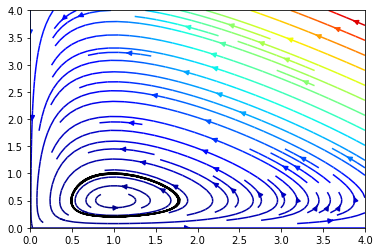

In [9]:
fig, axe = plt.subplots()
axe.streamplot(X, Y, U[0], U[1], color=H, broken_streamlines=True, cmap="jet")
axe.plot(sol.y[0,:], sol.y[1,:], color="black")
axe.set_xlim([X.min(), X.max()])
axe.set_ylim([Y.min(), Y.max()])

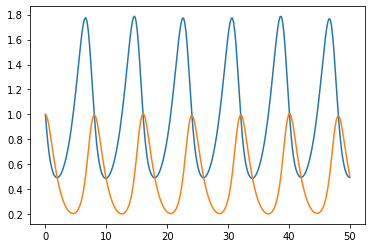

In [10]:
fig, axe = plt.subplots()
axe.plot(sol.t, sol.y[0,:])
axe.plot(sol.t, sol.y[1,:])